In [1]:
# libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

## Effectiveness graphical representation

In [2]:
### SET THE PARAMETERS ACCORDING TO YOUR NEEDS

# specify the number of classifiers
num_classifier = 5

# list of paths to 'classifierName_effectiveness.csv' files produced by Effectiveness notebook 
# 'classifierName' depends on what specified in variable 'classifier_name' of Effectiveness notebook
# the number of paths specified must coincide with num_classifier parameter specified above
path_list = [
"Centrifuge_effectiveness.csv",
"Kraken1_effectiveness.csv",
"Kraken2_effectiveness.csv",
"Clark_species_effectiveness.csv",
"Clark_genus_effectiveness.csv"
]
             
if num_classifier != len(path_list):
      print("Error! The number of paths in the list doesn't coincide with the number of classifiers specified above.")

In [3]:
### THE ANALYSIS STARTS HERE

## READ, LOAD AND CHECK INPUT PARAMETERS
# list containing the effectiveness info for each classifier
# effectiveness info retrieved from classiferName_effectiveness.csv files speciefied above
classifiers_list = []

# fill the list with the effectiveness info
for i in range(0, num_classifier):
    
    classifier_info = []

    with open(path_list[i], 'r') as file:
        csv_file = csv.DictReader(file)
        for row in csv_file:
            if(row['Parameter']!= 'classifier'):
                classifier_info.append((row['Parameter'], int(row['Value'])))
            else:
                classifier_info.append((row['Parameter'], row['Value']))
                
    classifiers_list.append(classifier_info)

# check if input files are correct (i.e. if num clusters and num reads of each classifier are equals)
error = False
for i in range(0, num_classifier):
    j = i + 1
    while (j < num_classifier):
        if classifiers_list[i][1][1] != classifiers_list[j][1][1] or classifiers_list[i][3][1] != classifiers_list[j][3][1]:
            error = True
            print("Error in input files!")
            break
        j = j + 1

In [4]:
## PLOT GENERATION STARTS HERE   
if not error:
    num_clusters = classifiers_list[1][1][1]
    num_reads = classifiers_list[1][3][1]
    
# labels of x-axis of all graphs that will be generated
labels = []

# tot clusters per classifier
cluster_tot = []

# tot reads per classifier
num_read_list = []

# patological clusters per classifier
patological_clusters = []

# zero clusters per classifier
zero_clusters = []

# patological reads per classifier
patological_read = []

# num zero reads per classifier
num_zero_read = []

# num non zero reads per classifier
num_non_zero_read = []

# num ties per classifier
ties = []

# num zero ties per classifier
zero_ties = []

# fill all lists
for i in range(0, num_classifier):
    labels.append(classifiers_list[i][0][1])
    cluster_tot.append(classifiers_list[i][1][1])
    num_read_list.append(classifiers_list[i][3][1])
    patological_clusters.append(classifiers_list[i][2][1])
    zero_clusters.append(classifiers_list[i][5][1])
    patological_read.append(classifiers_list[i][4][1])
    num_zero_read.append(classifiers_list[i][6][1])
    num_non_zero_read.append(classifiers_list[i][7][1])
    ties.append(classifiers_list[i][8][1])
    zero_ties.append(classifiers_list[i][9][1])

### Pathological clusters absolute

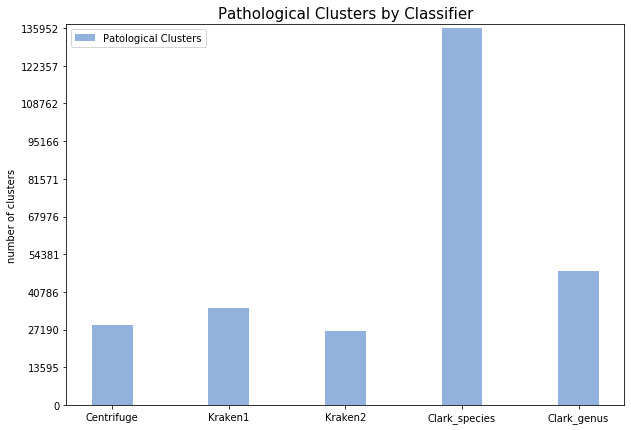

In [5]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, patological_clusters, width, label='Patological Clusters', color='#93B1DD')

plt.ylim(0, max(patological_clusters) + max(patological_clusters)/100)
plt.yticks(np.arange(0, max(patological_clusters) + max(patological_clusters)/100, max(patological_clusters)/10))

fig.set_size_inches(10, 7)

ax.set_ylabel('number of clusters', fontsize = 10)
ax.set_title('Pathological Clusters by Classifier', fontsize = 15)
ax.legend(fontsize = 10, loc='upper left' )

plt.show()

### Pathological clusters relative

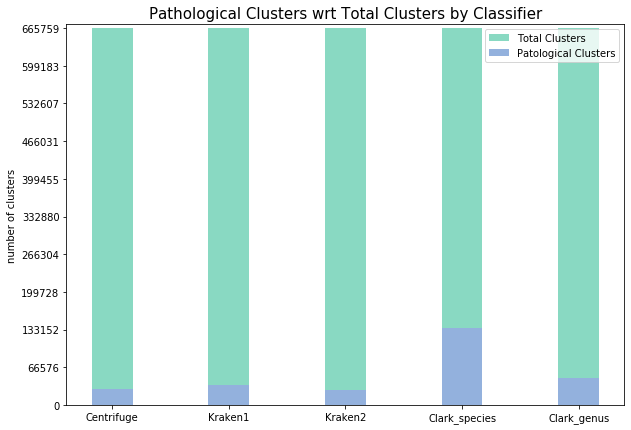

In [6]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

plt.ylim(0, max(cluster_tot) + max(cluster_tot)/100)
plt.yticks(np.arange(0, max(cluster_tot) + max(cluster_tot)/100, max(cluster_tot)/10))

ax.bar(labels, cluster_tot, width, label='Total Clusters', color='#89D9C2')
ax.bar(labels, patological_clusters, width, label='Patological Clusters', color='#93B1DD')

fig.set_size_inches(10, 7)

ax.set_ylabel('number of clusters', fontsize = 10)
ax.set_title('Pathological Clusters wrt Total Clusters by Classifier', fontsize = 15)
ax.legend()

plt.show()

### Majority zero clusters

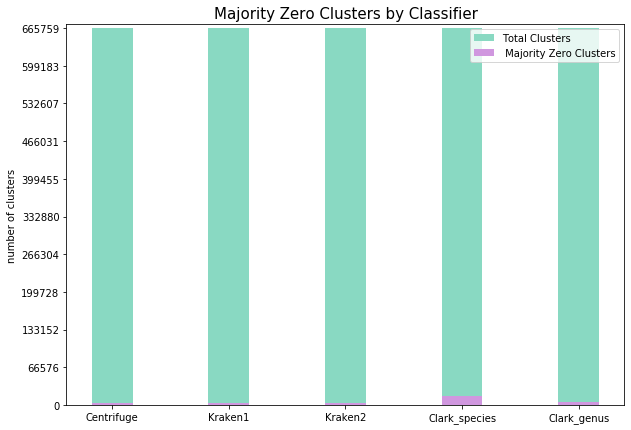

In [7]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

plt.ylim(0,max(cluster_tot) + max(cluster_tot)/100)
plt.yticks(np.arange(0, max(cluster_tot) + max(cluster_tot)/100, max(cluster_tot)/10))

fig.set_size_inches(10, 7)

ax.bar(labels, cluster_tot, width, label='Total Clusters', color='#89D9C2')
ax.bar(labels, zero_clusters, width, label=' Majority Zero Clusters', color='#D097DF')

ax.set_ylabel('number of clusters', fontsize = 10)
ax.set_title('Majority Zero Clusters by Classifier', fontsize = 15)
ax.legend(loc = 'upper right')

plt.show()

### Pathological clusters and majority zero clusters

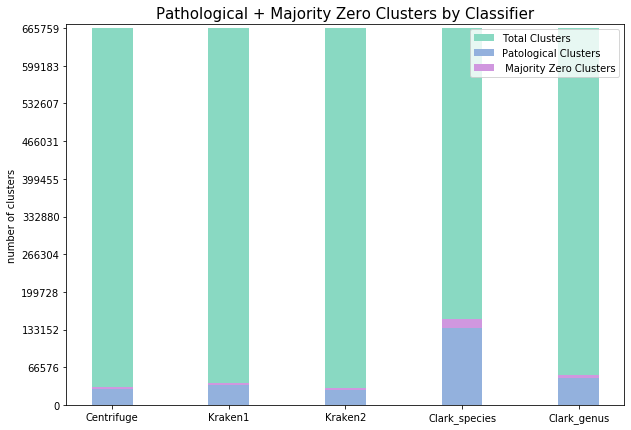

In [8]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

plt.ylim(0,max(cluster_tot) + max(cluster_tot)/100)
plt.yticks(np.arange(0, max(cluster_tot) + max(cluster_tot)/100, max(cluster_tot)/10))

fig.set_size_inches(10, 7)

ax.bar(labels, cluster_tot, width, label='Total Clusters', color='#89D9C2')
ax.bar(labels, patological_clusters, width, label='Patological Clusters', color='#93B1DD')
ax.bar(labels, zero_clusters, width, bottom=patological_clusters, label=' Majority Zero Clusters', color='#D097DF')

ax.set_ylabel('number of clusters', fontsize = 10)
ax.set_title('Pathological + Majority Zero Clusters by Classifier', fontsize = 15)
ax.legend(loc = 'upper right')
#fig.savefig('patological_cluster-all_250000.png')

plt.show()

### Pathological reads absolute

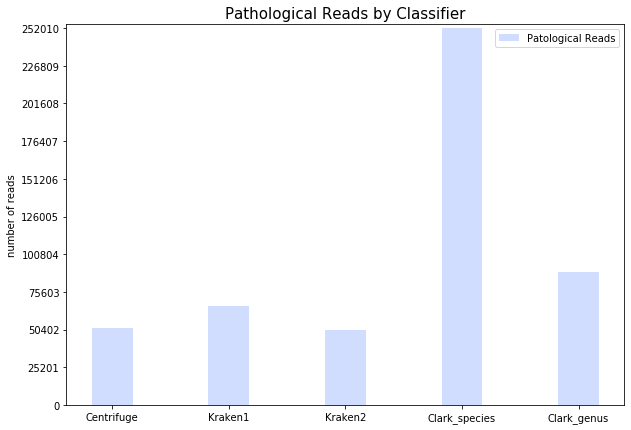

In [9]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, patological_read, width, label='Patological Reads', color='#d0ddff')

plt.ylim(0, max(patological_read) + max(patological_read)/100)
plt.yticks(np.arange(0, max(patological_read) + max(patological_read)/100, max(patological_read)/10))

fig.set_size_inches(10, 7)

ax.set_ylabel('number of reads', fontsize = 10)
ax.set_title('Pathological Reads by Classifier', fontsize = 15)
ax.legend()

plt.show()

### Zero and non zero reads relative

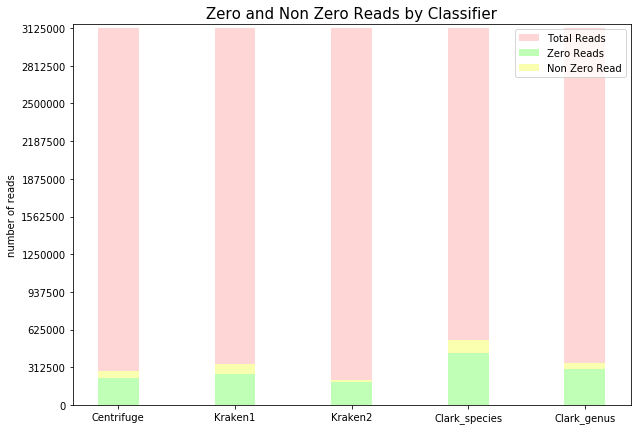

In [10]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, num_read_list, width, label='Total Reads', color='#ffd6d6')
ax.bar(labels, num_zero_read, width, label='Zero Reads', color='#c0ffb6')
ax.bar(labels, num_non_zero_read, width, bottom=num_zero_read, label='Non Zero Read', color='#faffb0')

fig.set_size_inches(10, 7)

plt.ylim(0, num_reads + num_reads/100)
plt.yticks(np.arange(0, num_reads + num_reads/100, num_reads/10))

ax.set_ylabel('number of reads', fontsize = 10)
ax.set_title('Zero and Non Zero Reads by Classifier', fontsize = 15)
ax.legend(loc = 'upper right')

plt.show()

### Pathological, zero and non zero read relative

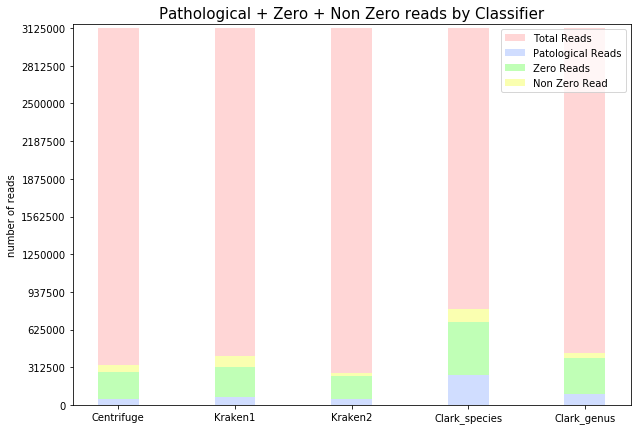

In [11]:
sum = []

for i in range(0, num_classifier):
    sum.append(patological_read[i] + num_zero_read[i])
    
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, num_read_list, width, label='Total Reads', color='#ffd6d6')
ax.bar(labels, patological_read, width, label='Patological Reads', color='#d0ddff')
ax.bar(labels, num_zero_read, width, bottom = patological_read, label='Zero Reads', color='#c0ffb6')
ax.bar(labels, num_non_zero_read, width, bottom=sum, label='Non Zero Read', color='#faffb0')

fig.set_size_inches(10, 7)

plt.ylim(0, num_reads + num_reads/100)
plt.yticks(np.arange(0, num_reads + num_reads/100, num_reads/10))

ax.set_ylabel('number of reads', fontsize = 10)
ax.set_title('Pathological + Zero + Non Zero reads by Classifier', fontsize = 15)
ax.legend(loc = 'upper right')

plt.show()

### Pathological, zero and non zero reads after total reassigment

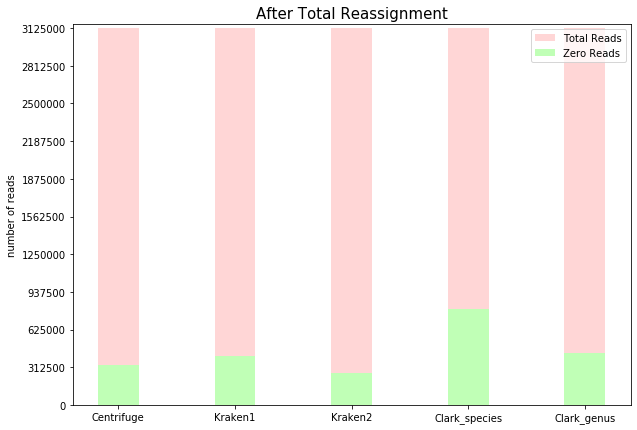

In [12]:
sum = []

for i in range(0, num_classifier):
    sum.append(num_zero_read[i] + num_non_zero_read[i] + patological_read[i])
    
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, num_read_list, width, label='Total Reads', color='#ffd6d6')
ax.bar(labels, sum, width, label='Zero Reads', color='#c0ffb6')

fig.set_size_inches(10, 7)

plt.ylim(0, num_reads + num_reads/100)
plt.yticks(np.arange(0, num_reads + num_reads/100, num_reads/10))

ax.set_ylabel('number of reads')
ax.set_title('After Total Reassignment', fontsize = 15)
ax.legend()

plt.show()

### Ties and zero ties absolute

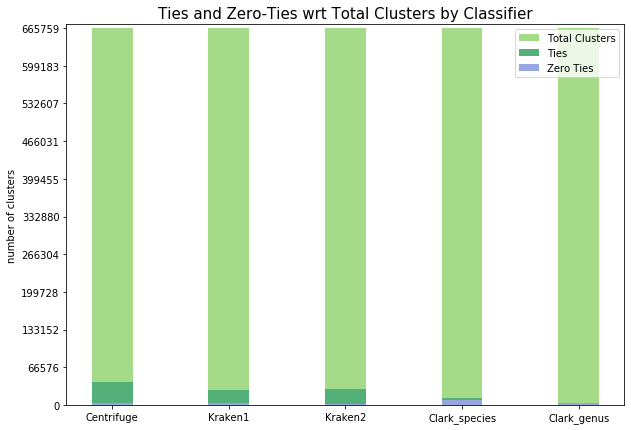

In [13]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, cluster_tot, width, label='Total Clusters', color='#A5DA89')
ax.bar(labels, ties, width, label='Ties', color='#53b078')
ax.bar(labels, zero_ties, width, label='Zero Ties', color='#98A6DF')

plt.ylim(0, num_clusters + num_clusters/100)
plt.yticks(np.arange(0, num_clusters + num_clusters/100, num_clusters/10))

fig.set_size_inches(10, 7)

ax.set_ylabel('number of clusters')
ax.set_title('Ties and Zero-Ties wrt Total Clusters by Classifier', fontsize = 15)
ax.legend(loc = 'upper right')

plt.show()

### Ties and zero ties absolute

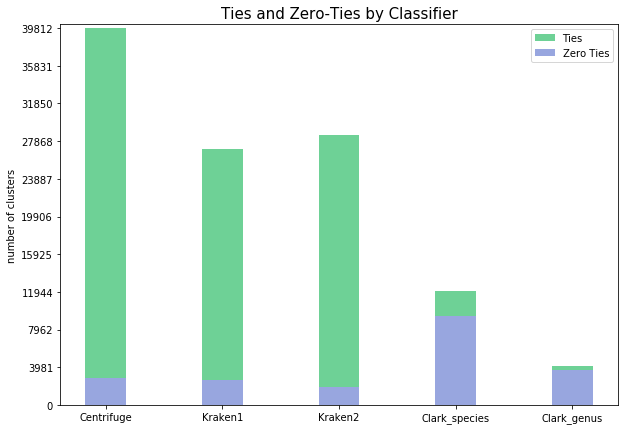

In [14]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, ties, width, label='Ties', color='#6ED196')
ax.bar(labels, zero_ties, width, label='Zero Ties', color='#98A6DF')

plt.ylim(0, max(ties) + max(ties)/100)
plt.yticks(np.arange(0, max(ties) + max(ties)/10, max(ties)/10))

fig.set_size_inches(10, 7)

ax.set_ylabel('number of clusters')
ax.set_title('Ties and Zero-Ties by Classifier', fontsize = 15)
ax.legend(loc = 'upper right')

plt.show()